In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

Clase y funciones para abrir el archivo, guardar la inrformacion de las imagenes y sus clases, y aleatorizarlos.

In [2]:
def shuffle_lists(lst, lst2):
    n = len(lst2)
    for i in range(n - 1, 0, -1):
        j = random.randint(0, i)
        lst[i], lst[j] = np.copy(lst[j]), np.copy(lst[i])
        lst2[i], lst2[j] = lst2[j], lst2[i]
    return lst, lst2

def shuffle(data, target):
    # Hacer un shuffle de las listas
    dataRand, targetRand = shuffle_lists(data, target)
    return dataRand, targetRand

In [3]:
# Leer el archivo de texto
class Data:
    def __init__(self):
        self._data = None
        self._target = None
        self._randomData = None
        self._randomTarget = None
        
    # Metodos getters
    def getRandomData(self):
        return self._randomData
    
    def getRandomTarget(self):
        return self._randomTarget
    
    # Funcion para leer el archivo y guardar las imagenes y sus clases
    def load_data(self):
        with open("optdigits.tes", "r") as datos:
            valores = []
            for linea in datos:
                valores.append([x for x in linea.strip().split(",")])
                
            # Crear matriz para guardar los valores de data
            data = np.zeros((len(valores), 64))
            for i in range(len(valores)):
                data[i] = valores[i][:64]
                
            self._data = np.copy(data)
            
            # Crear matriz para guardar los valores de target (clases)
            target = np.zeros((len(valores)))
            for i in range(len(valores)):
                target[i] = valores[i][64]
                
            self._target = np.copy(target)
            
            
        print("Se cargaron los datos")
    
    # Funcion para aleatorizar la informacion guardada
    def randomizer(self):
        # Crear matriz auxiliar para permutar filas de la matriz de datos
        numDatos, numChar = self._data.shape
        
        randomData = np.copy(self._data)
        # Crear arreglo auxiliar para permutar clases
        numTarget = self._target.shape
        
        randomTarget = np.copy(self._target)
        
        # Tomar un valor random desde 0 hasta numDatos y mezclar
        a, b = shuffle(randomData, randomTarget)
        
        # Guardar la matriz con filas intercambiadas y el arreglo con datos intercambiados
        self._randomData = np.copy(a)
        self._randomTarget = np.copy(b)
        print("Datos aleatorizados")

Cargar el archivo y hacer aleatorios los datos con los que se va a trabajar

In [4]:
data = Data()
data.load_data()
data.randomizer()

Se cargaron los datos
Datos aleatorizados


In [5]:
# Devuelve los imagenes aleatorias con las que se va a trabajar
datos = data.getRandomData()
datos[:2]

array([[ 0.,  0.,  2., 15., 15.,  4.,  0.,  0.,  0.,  0., 11., 10., 14.,
         9.,  0.,  0.,  0.,  0.,  1.,  0., 11.,  9.,  0.,  0.,  0.,  0.,
         0.,  3., 15.,  4.,  0.,  0.,  0.,  0.,  1., 16., 16., 14.,  6.,
         0.,  0.,  0.,  0.,  8., 13.,  6.,  1.,  0.,  0.,  0.,  0.,  9.,
         7.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,
         0.,  0.,  0.,  0.,  0.,  8., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
         5., 16., 13.,  1.,  0.,  0.,  0.,  0.,  1.,  5., 14.,  6.,  0.,
         0.,  0.,  0.,  0.,  0.,  8., 11.,  0.,  0.,  0.,  0.,  8., 12.,
         9., 16.,  6.,  4.,  0.,  0.,  7., 16., 16., 16., 16., 14.]])

In [6]:
# Devuelve las clases de las imagenes aleatorizadas
target = data.getRandomTarget()
target

array([7., 1., 0., ..., 8., 9., 5.])

Se muestra un ejemplo de imagen aleatoria y su clase correspondiente

Numero3.0


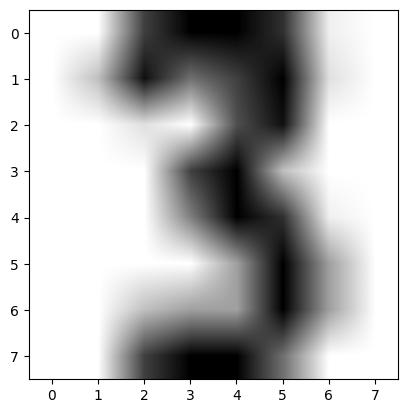

In [7]:
# Ejemplo
num = random.randint(0, 1700)
datos_res = np.reshape(datos[num], (8,8))
print(f"Numero{target[num]}")
plt.imshow(datos_res, cmap=plt.cm.gray_r, interpolation="bilinear")

In [8]:
# Dataframe para visualizar los datos
df = pd.DataFrame(datos)
#df["target"] = target
df.head(10)

0    1     2     3     4     5    6    7    8    9   ...    54   55   56  \
0  0.0  0.0   2.0  15.0  15.0   4.0  0.0  0.0  0.0  0.0  ...   0.0  0.0  0.0   
1  0.0  0.0  10.0   9.0   0.0   0.0  0.0  0.0  0.0  0.0  ...   6.0  4.0  0.0   
2  0.0  0.0   5.0  16.0  14.0   1.0  0.0  0.0  0.0  0.0  ...   0.0  0.0  0.0   
3  0.0  0.0   0.0  12.0   7.0   0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0  0.0   
4  0.0  1.0  15.0  16.0   4.0   0.0  0.0  0.0  0.0  9.0  ...  12.0  1.0  0.0   
5  0.0  0.0   2.0  14.0  13.0   0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0  0.0   
6  0.0  0.0   0.0   7.0  14.0  16.0  6.0  0.0  0.0  0.0  ...   0.0  0.0  0.0   
7  0.0  0.0   4.0  12.0   1.0   0.0  0.0  0.0  0.0  0.0  ...  12.0  0.0  0.0   
8  0.0  0.0   4.0  15.0  16.0  11.0  0.0  0.0  0.0  0.0  ...   0.0  0.0  0.0   
9  0.0  0.0  13.0  14.0   8.0   1.0  0.0  0.0  0.0  1.0  ...   0.0  0.0  0.0   

    57    58    59    60    61    62    63  
0  0.0   1.0  15.0   2.0   0.0   0.0   0.0  
1  0.0   7.0  16.0  16.0  16.0  16.0  14.0  
2  0.0   3.0  15.0  15.0   5.0   0.0   0.0  
3  0.0   0.0  12.0   9.0   0.0   0.0   0.0  
4  0.0  13.0  16.0  16.0  15.0  11.0   1.0  
5  0.0   0.0  16.0   5.0   0.0   0.0   0.0  
6  0.0   0.0   9.0   6.0   0.0   0.0   0.0  
7  0.0   5.0  13.0  16.0  11.0   1.0   0.0  
8  0.0   6.0  11.0   0.0   0.0   0.0   0.0  
9  1.0  13.0  14.0  12.0  12.0   0.0   0.0  

[10 rows x 64 columns]

In [9]:
K=5
v1 = 26
v2=35
v3=30

In [10]:
min = 0
max = 16


In [11]:
mu=[]
for i in range(0,K):
    numrandom = []
    for j in range(64):
        x = np.random.randint(16)
        numrandom.append(x)
    mu.append(numrandom)
    
mu=np.array(mu)
mu

array([[ 1, 10,  7,  2, 15, 12,  1,  8, 14,  7, 14, 10, 15,  3, 12, 14,
         0, 13,  0, 12,  4, 15, 12,  3, 10,  7,  2,  8, 13, 15,  3,  2,
        10,  4,  6, 14,  2, 13, 13,  1,  5,  2,  1,  4, 10,  7, 13,  0,
        13, 11,  1,  1, 13,  9,  6, 11,  2,  1, 10, 14, 13,  2, 12,  1],
       [ 0,  5, 15,  7, 12, 13,  4,  2,  7,  3,  0,  7,  5,  0,  0, 13,
         4,  6,  3,  5, 13,  1, 14,  9, 11, 11, 15, 15,  0,  0,  8,  9,
         4,  9, 12,  1,  4,  7, 14, 11,  8,  4,  8,  1, 13, 13, 12,  5,
         5,  4,  2,  2,  3,  7, 10,  6,  0,  3,  5,  6, 15, 15,  4, 12],
       [12,  8,  0, 12,  6, 10,  9,  2,  7,  2,  6, 13, 12,  3,  3,  0,
         3, 14,  6,  5,  4,  0,  5, 15,  0, 13, 12,  0,  8,  3,  1,  7,
        15, 14,  3,  7,  1, 14,  9, 15,  8,  8,  6,  8, 12,  6, 12,  0,
         7, 14, 13, 13,  0, 15,  7,  7,  8,  9, 14,  5, 14, 13, 11, 10],
       [12, 13, 13,  3, 13, 12, 15, 15, 10,  1, 12, 11,  2,  0,  2,  7,
         5, 13,  3,  5, 12, 10,  6,  7, 14,  4,  1,  1,  3, 1

In [12]:
r=np.zeros(df.shape[0]*K).reshape(df.shape[0],K)
pd.DataFrame(r)

0    1    2    3    4
0     0.0  0.0  0.0  0.0  0.0
1     0.0  0.0  0.0  0.0  0.0
2     0.0  0.0  0.0  0.0  0.0
3     0.0  0.0  0.0  0.0  0.0
4     0.0  0.0  0.0  0.0  0.0
...   ...  ...  ...  ...  ...
1792  0.0  0.0  0.0  0.0  0.0
1793  0.0  0.0  0.0  0.0  0.0
1794  0.0  0.0  0.0  0.0  0.0
1795  0.0  0.0  0.0  0.0  0.0
1796  0.0  0.0  0.0  0.0  0.0

[1797 rows x 5 columns]

In [13]:
plot_counter=0
J_plot=[]
for i in range(1,100):
    J=0
    
    
    for n in range(0,df.shape[0]): 
        x=np.array(df.iloc[n,0:64])
        mins=[]

        for k in range(0,K):
            distance=np.linalg.norm(x-mu[k]) # Distancia Euclidiana
            mins.append(distance**2)

        k_r=np.argmin(np.array(mins)) # Ontener distancia minima
        r[n,k_r]=1
    
    
    for n in range(0,df.shape[0]):
        for k in range(0,K):
            distance=np.linalg.norm(x-mu[k])
            J=r[n,k]*(distance**2)+J
    J_plot.append(J)

    
    for k in range(0,K):
        count_1,count_2=0,0
        for n in range(0,df.shape[0]):
            x=np.array(df.iloc[n,0:64])
            #if(count_2 != 0):
            count_1=r[n,k]*x+count_1
            count_2=r[n,k]+count_2
        mu[k]=count_1/count_2
        
    print(J)
    
    
    if i>1 and abs(J-J_prev)<0.5:
        break
    J_prev=J
    plot_counter=1+plot_counter
    
    
    r=np.zeros(df.shape[0]*K).reshape(df.shape[0],K)

6355604.0
2608381.0
2800419.0
2888903.0
2912478.0
2887482.0
2870284.0
2872001.0
2858835.0
2849863.0
2861894.0
2861894.0


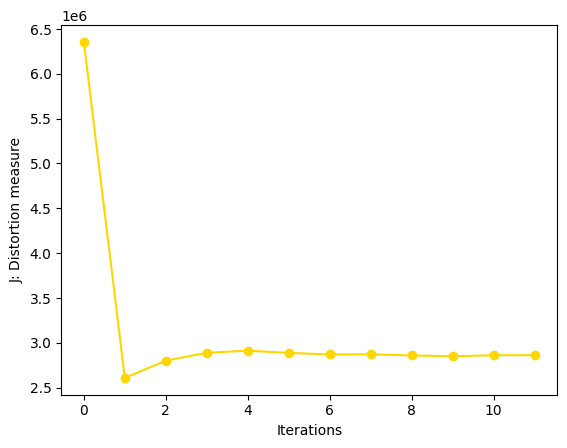

In [14]:
plt.plot(J_plot,linestyle='-', marker='o',color='gold')
plt.ylabel('J: Distortion measure')
plt.xlabel('Iterations')
plt.show()

In [15]:
mu

array([[ 0,  0,  7, 12, 12,  7,  1,  0,  0,  3, 12,  9, 10, 10,  1,  0,
         0,  3,  9,  4,  8, 10,  1,  0,  0,  1,  7, 10, 13,  9,  1,  0,
         0,  0,  2,  5,  8, 11,  3,  0,  0,  0,  1,  1,  3, 11,  5,  0,
         0,  0,  7,  5,  7, 12,  5,  0,  0,  0,  7, 13, 13,  9,  1,  0],
       [ 0,  0,  2, 10, 10,  2,  0,  0,  0,  0,  8, 14,  8,  4,  0,  0,
         0,  1, 12,  8,  1,  5,  2,  0,  0,  4, 13,  5,  2,  7,  4,  0,
         0,  5, 13,  7,  7, 10,  5,  0,  0,  3, 13,  7,  6, 11,  5,  0,
         0,  0,  9, 10,  9, 10,  4,  0,  0,  0,  2, 11, 13,  7,  1,  0],
       [ 0,  0, 10, 14,  7,  1,  0,  0,  0,  5, 13, 12, 11,  3,  0,  0,
         0,  4,  8,  6, 12,  3,  0,  0,  0,  0,  2,  7, 12,  2,  0,  0,
         0,  0,  1, 10, 10,  1,  0,  0,  0,  0,  4, 11,  7,  2,  1,  0,
         0,  1, 11, 13, 11, 11,  7,  1,  0,  0, 10, 14, 13, 12,  8,  2],
       [ 0,  0,  2,  9, 12,  5,  0,  0,  0,  0,  5, 12, 13,  9,  1,  0,
         0,  0,  7, 13, 12,  8,  1,  0,  0,  1,  8, 13, 13,  

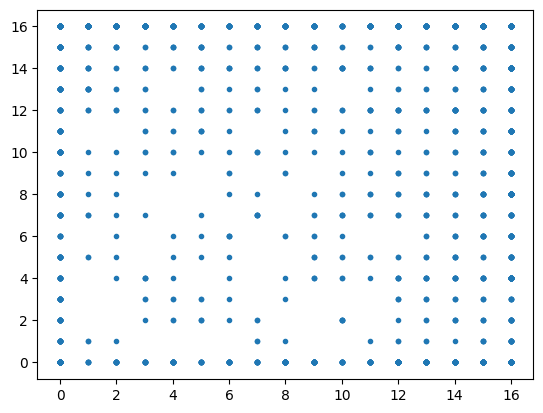

In [16]:
plt.scatter(df[v1],df[v2],marker='.')
plt.show()

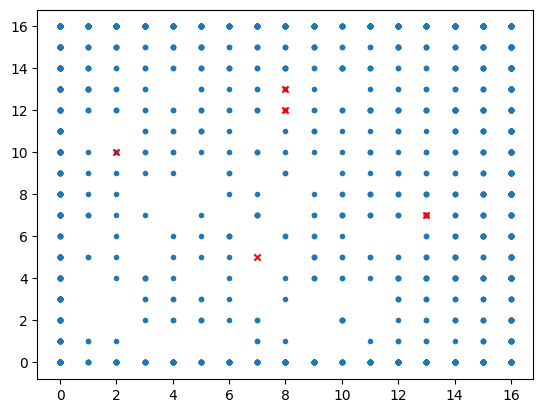

In [17]:
mu=pd.DataFrame(mu)
plt.scatter(df[v1],df[v2],marker='.')
plt.scatter(mu[v1],mu[v2],s=20,marker='x',color='red')
plt.show()

In [18]:
r_new=[]
for row in r:
    r_new.append(np.argmax(row)+1)
df[64]=r_new

0     7
1    13
2     2
3     8
4     8
Name: 26, dtype: int32 
 0     5
1     7
2    10
3    13
4    12
Name: 35, dtype: int32


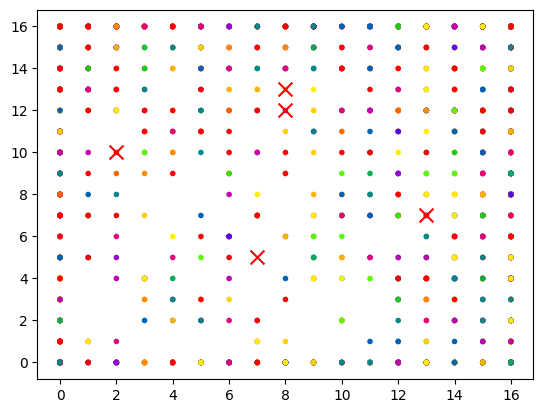

In [61]:
print(mu[v1],"\n",mu[v2])
plt.scatter(df[v1],df[v2],c=df[k], cmap = 'prism_r',marker='.')
plt.scatter(mu[v1],mu[v2],s=100,marker='x',color='red')
plt.show()

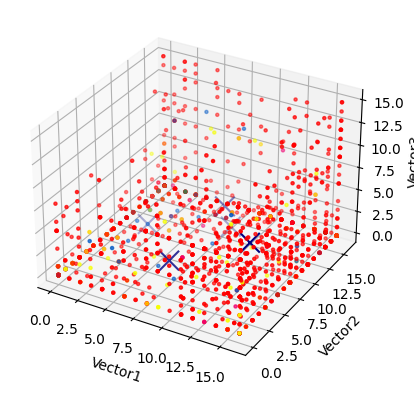

In [47]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 =df[v1]
y1 =df[v2]
z1 =df[v3]

x2=mu[v1]
y2=mu[v2]
z2=mu[v3]


ax.scatter(x1, y1, z1, c=df[1], cmap = 'prism', marker='.')
ax.scatter(x2, y2, z2, c='navy', s=200, marker='x')

ax.set_xlabel('Vector1')
ax.set_ylabel('Vector2')
ax.set_zlabel('Vector3')

plt.show()